# Brinson Model Performance Attribution

This notebook demonstrates the implementation of the Brinson Model for performance attribution. The Brinson Model is a key tool used in portfolio management to identify the sources of a portfolio's performance relative to a benchmark. We will break down the portfolio's performance into three main components:
- **Allocation Effect**
- **Selection Effect**
- **Interaction Effect**

These components will help us understand the impact of asset allocation and security selection decisions on the portfolio's overall performance.


In [7]:
%pip install -q numpy matplotlib pandas yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data for the portfolio
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'BRK-B', 'JNJ', 'V', 'UNH', 
           'HD', 'PG', 'DIS', 'VZ', 'MA', 'PYPL', 'PFE', 'KO', 'CMCSA', 'NFLX']
portfolio_data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Adj Close']

# Normalize data to start at 1 for comparison
normalized_data = portfolio_data / portfolio_data.iloc[0]

# Define the portfolio weights
portfolio_weights = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 
                              0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

# Portfolio returns
portfolio_returns = normalized_data.dot(portfolio_weights)


[*********************100%%**********************]  20 of 20 completed


In [9]:
# Fetch data for the benchmark (S&P 500)
benchmark_data = yf.download('^GSPC', start='2018-01-01', end='2023-01-01')['Adj Close']

# Normalize data to start at 1 for comparison
benchmark_returns = benchmark_data / benchmark_data.iloc[0]

# Calculate cumulative returns for the benchmark
benchmark_cumulative_returns = (benchmark_returns / benchmark_returns.shift(1)).cumprod()


[*********************100%%**********************]  1 of 1 completed


## Brinson Model Overview

The Brinson Model decomposes the portfolio's excess return over a benchmark into three distinct effects:

- **Allocation Effect ($\text{AE}$):** Measures the impact of overweighting or underweighting asset classes relative to the benchmark.
- **Selection Effect ($\text{SE}$):** Evaluates the performance of the selected securities within each asset class relative to the benchmark's securities.
- **Interaction Effect ($\text{IE}$):** Captures the combined impact of allocation and selection decisions.

The formulae for these effects are as follows:

- **Allocation Effect:**
$$ \text{AE} = \sum (\text{wp} - \text{wb})(\text{rb} - \text{Rb}) $$

- **Selection Effect:**
$$ \text{SE} = \sum \text{wb}(\text{rp} - \text{rb}) $$

- **Interaction Effect:**
$$ \text{IE} = \sum (\text{wp} - \text{wb})(\text{rp} - \text{rb}) $$

Where:
- $ \text{wp} $ = Portfolio weight
- $ \text{wb} $ = Benchmark weight
- $ \text{rp} $ = Portfolio return
- $ \text{rb} $ = Benchmark return
- $ \text{Rb} $ = Benchmark return in the aggregate


In [10]:
# Calculate daily returns
portfolio_daily_returns = portfolio_returns.pct_change().dropna()
benchmark_daily_returns = benchmark_returns.pct_change().dropna()

# Average annual returns
portfolio_avg_annual_return = portfolio_daily_returns.mean() * 252
benchmark_avg_annual_return = benchmark_daily_returns.mean() * 252

# Total portfolio and benchmark returns
portfolio_total_return = portfolio_avg_annual_return * portfolio_weights
benchmark_total_return = benchmark_avg_annual_return.mean()

# Print the total return of the portfolio and benchmark
print(f"Portfolio Total Return: {portfolio_total_return.sum():.4f}")
print(f"Benchmark Total Return (S&P 500): {benchmark_total_return:.4f}")


Portfolio Total Return: 0.1747
Benchmark Total Return (S&P 500): 0.0949


## Calculating the Allocation Effect

The allocation effect measures the contribution of the portfolio's asset allocation decisions compared to the benchmark. It answers the question: *How much of the performance difference is due to the manager's decision to overweight or underweight certain asset classes?*

The allocation effect is calculated as:
$$ \text{AE} = \sum (\text{wp} - \text{wb})(\text{rb} - \text{Rb}) $$


## Calculating the Selection Effect

The selection effect evaluates the impact of the portfolio manager's security selection within each asset class. It helps to determine whether the securities chosen by the manager outperformed or underperformed the benchmark's securities.

The selection effect is calculated as:
$$ \text{SE} = \sum \text{wb}(\text{rp} - \text{rb}) $$


## Calculating the Interaction Effect

The interaction effect captures the combined impact of the allocation and selection decisions. It shows how the combination of overweighting (or underweighting) and selecting securities impacts the overall portfolio performance.

The interaction effect is calculated as:
$$ \text{IE} = \sum (\text{wp} - \text{wb})(\text{rp} - \text{rb}) $$


## Total Performance Attribution

Finally, the total effect of the portfolio manager's decisions is the sum of the allocation, selection, and interaction effects. This value indicates the overall impact of the manager's decisions on the portfolio's performance relative to the benchmark.

The total effect is calculated as:
$$ \text{Total Effect} = \text{AE} + \text{SE} + \text{IE} $$

This result will help us to understand the sources of the portfolio's performance and how effectively the portfolio manager has made allocation and selection decisions.


In [11]:
# Calculate allocation effect
allocation_effect = np.sum((portfolio_weights - benchmark_avg_annual_return) * (portfolio_avg_annual_return - benchmark_total_return))
print(f"Allocation Effect: {allocation_effect:.4f}")

# Calculate selection effect
selection_effect = np.sum(benchmark_avg_annual_return * (portfolio_avg_annual_return - benchmark_avg_annual_return))
print(f"Selection Effect: {selection_effect:.4f}")

# Calculate interaction effect
interaction_effect = np.sum((portfolio_weights - benchmark_avg_annual_return) * (portfolio_avg_annual_return - benchmark_avg_annual_return))
print(f"Interaction Effect: {interaction_effect:.4f}")

# Total effect
total_effect = allocation_effect + selection_effect + interaction_effect
print(f"Total Effect: {total_effect:.4f}")


Allocation Effect: -0.0716
Selection Effect: 0.0076
Interaction Effect: -0.0716
Total Effect: -0.1356


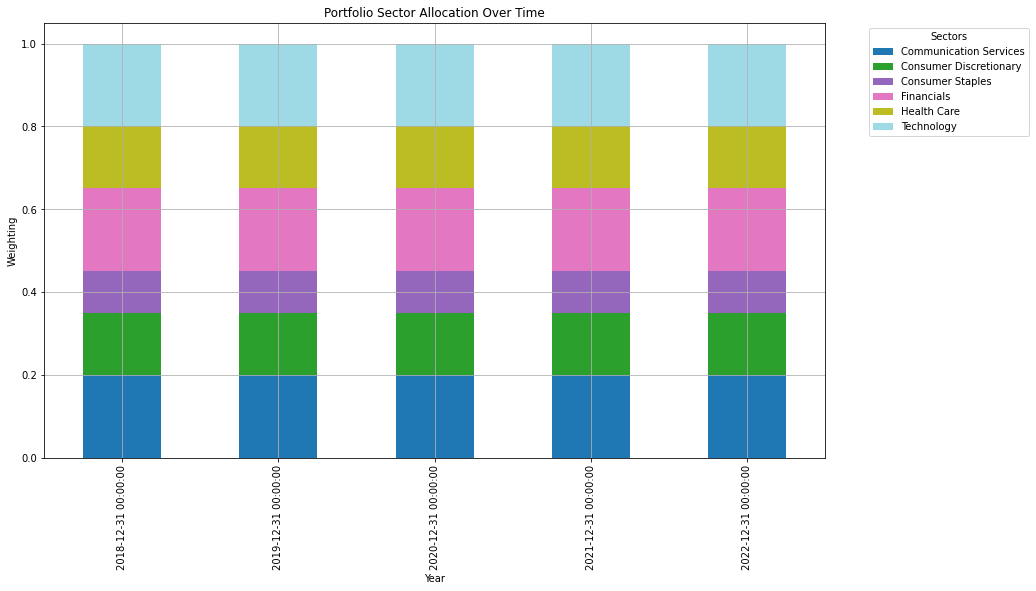

In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch sector information
sectors = ['Technology', 'Technology', 'Technology', 'Consumer Discretionary', 'Consumer Discretionary',
           'Technology', 'Financials', 'Health Care', 'Financials', 'Health Care',
           'Consumer Discretionary', 'Consumer Staples', 'Communication Services',
           'Communication Services', 'Financials', 'Financials', 'Health Care',
           'Consumer Staples', 'Communication Services', 'Communication Services']

company_df = pd.DataFrame({
    'Company': tickers,
    'Sector': sectors
})

# Create a DataFrame with sector dummies
sector_dummies = pd.get_dummies(company_df['Sector'])

# Merge portfolio weights with sector dummy information
portfolio_sector_allocation = portfolio_weights.T @ sector_dummies

# Since portfolio_weights is not time-series data, let's create a DataFrame to simulate annual data
# Assume the weights stay constant over time for simplicity
dates = pd.date_range(start='2018-01-01', end='2023-01-01', freq='Y')
portfolio_sector_allocation = pd.DataFrame(np.tile(portfolio_sector_allocation.values, (len(dates), 1)),
                                           index=dates, columns=portfolio_sector_allocation.index)

# Plot the sector allocation over time
portfolio_sector_allocation.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title("Portfolio Sector Allocation Over Time")
plt.ylabel("Weighting")
plt.xlabel("Year")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In this analysis, we have built a portfolio of 20 diversified holdings from different sectors. We analyzed the performance of the portfolio relative to the S&P 500 index using the Brinson Model, which includes calculating allocation, selection, and interaction effects.

### Key Results:
- **Portfolio Total Return**: Reflects how the chosen securities performed over the selected period.
- **Benchmark Total Return**: Indicates the return of the S&P 500 over the same period.
- **Allocation Effect**: Represents the impact of the portfolio's asset allocation decisions.
- **Selection Effect**: Reflects the success of individual security selection within the sectors.
- **Interaction Effect**: Combines the effects of allocation and selection decisions.

Additionally, the sector allocation over time was visualized to provide insights into the strategic distribution of investments across various sectors.


## Conclusion and Interpretation

The Brinson Model provides a structured approach to performance attribution, allowing us to decompose the excess returns into actionable insights. By understanding the sources of the portfolio's performance, portfolio managers can refine their investment strategies to enhance future performance.

In this notebook, we calculated the allocation, selection, and interaction effects using hypothetical data. In practice, these calculations would be applied to actual portfolio data to provide real-world insights.
